In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install tld

     |████████████████████████████████| 412 kB 5.2 MB/s 


In [3]:
import pandas as pd
import numpy as np
import re
from tld import get_fld

In [4]:
path_to_out_2015 = '/content/drive/MyDrive/quotes-2015-filtered.json.bz2'
path_to_out_2016 = '/content/drive/MyDrive/quotes-2016-filtered.json.bz2'
path_to_out_2017 = '/content/drive/MyDrive/quotes-2017-filtered.json.bz2'
path_to_out_2018 = '/content/drive/MyDrive/quotes-2018-filtered.json.bz2'
path_to_out_2019 = '/content/drive/MyDrive/quotes-2019-filtered.json.bz2'
path_to_out_2020 = '/content/drive/MyDrive/quotes-2020-filtered.json.bz2'
data_2015 = pd.read_json(path_to_out_2015, lines=True)
data_2016 = pd.read_json(path_to_out_2016, lines=True)
data_2017 = pd.read_json(path_to_out_2017, lines=True)
data_2018 = pd.read_json(path_to_out_2018, lines=True)
data_2019 = pd.read_json(path_to_out_2019, lines=True)
data_2020 = pd.read_json(path_to_out_2020, lines=True)

In [5]:
data = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020]
data_all = pd.concat(data)
data_all

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2015-01-14-004988,another layer of burdensome requirements [ tha...,None,[],2015-01-14 19:08:33,1,"[[None, 0.8135], [Mark Brownstein, 0.1865]]",[http://www.motherjones.com/blue-marble/2015/0...,E
1,2015-09-09-008765,As siltation is a natural process in the Meghn...,Anisul Islam Mahmud,[Q23762578],2015-09-09 07:40:37,11,"[[Anisul Islam Mahmud, 0.942], [None, 0.058]]","[http://trust.org/item/20150909073825-39czr, h...",E
2,2015-11-27-010826,"But taking money out of their pockets, I've al...",None,[],2015-11-27 01:45:07,1,"[[None, 0.8499], [phil jackson, 0.1501]]",[http://metrotextual.wordpress.com/2015/11/26/...,E
3,2015-02-09-029204,I want him to be Prime Minister because he sup...,None,[],2015-02-09 04:28:41,1,"[[None, 0.8177], [Malcolm Turnbull, 0.1823]]",[http://sbs.com.au/comedy/article/2015/02/09/w...,E
4,2015-08-20-016545,caused entirely or mostly by human activities.,None,[],2015-08-20 19:35:23,2,"[[None, 0.7455], [Pope Francis, 0.2545]]",[http://www.bloomberg.com/news/articles/2015-0...,E
...,...,...,...,...,...,...,...,...,...
41869,2020-02-15-048259,this balanced red blends weight and power with...,None,[],2020-02-15 15:00:00,1,"[[None, 0.8541], [James Suckling, 0.1459]]",[http://sootoday.com/columns/wine-all-the-time...,E
41870,2020-01-21-085595,This concept of over-regulation is an interest...,Tim Ryan,"[Q10381179, Q3528685, Q513960, Q7804212, Q7804...",2020-01-21 00:00:00,3,"[[Tim Ryan, 0.7641], [None, 0.2359]]",[http://nordic.businessinsider.com/pwc-ceo-sur...,E
41871,2020-01-26-053553,"Well, Joe, you're wrong.",Bernie Sanders,[Q359442],2020-01-26 17:01:39,10,"[[Bernie Sanders, 0.8208], [None, 0.1573], [Jo...",[https://www.nytimes.com/live/2020/iowa-democr...,E
41872,2020-02-23-041538,We've been writing about climate change being ...,Lesley Hughes,[Q53473786],2020-02-23 22:38:42,2,"[[Lesley Hughes, 0.9023], [None, 0.0978]]",[https://www.nytimes.com/2020/02/23/world/aust...,E


In [6]:
data_all['domain_name'] = data_all.urls.map(lambda urls: [get_fld(el) for el in urls])

In [10]:
data_all = data_all[np.logical_not(data_all.quotation.str.contains('display:'))]

In [11]:
# Number of quotes per domaine name
domaine_quotes_count = data_all['domain_name'].explode().value_counts()
print('breitbart.com -> '+str(domaine_quotes_count.loc['breitbart.com']))
print('insideclimatenews.org -> '+str(domaine_quotes_count.loc['insideclimatenews.org']))

breitbart.com -> 39854
insideclimatenews.org -> 21200


In [13]:
# Number of quotes unique per journal
unique_quotes=[]
for el in data_all['domain_name']:
  unique_quotes.extend(set(el))
domaine_unique_quotes_count=pd.Series(unique_quotes).value_counts()

print('breitbart.com -> '+str(domaine_unique_quotes_count.loc['insideclimatenews.org']))
print('insideclimatenews.org -> '+str(domaine_unique_quotes_count.loc['breitbart.com']))

breitbart.com -> 19972
insideclimatenews.org -> 23184


In [ ]:
# Generate distribution of quotes useimport plotly.express as px
dist_b=[]
for i in range(max):
  dist_b.append(shape(data_all[data_all.domain_name.map(lambda x: x.count('breitbart.com') > i)])[0])
new_table = np.c_[np.array([i+1 for i in range(max)]),dist_b]
df = pd.DataFrame(new_table, columns = ['Number of times of used quotes','Number of quotes'])
fig = px.line(df, x="Number of times of used quotes", y='Number of quotes',log_y=True,log_x=True)
fig.write_html('/content/drive/MyDrive/power_law_final.html')
fig.show()

In [14]:
# Number of quotations quoted only by 1 journal
quotation_by_single_newspaper=[]
for el in data_all['domain_name']:
  if np.size(el)<=1:
    quotation_by_single_newspaper.extend(el)
pd.Series(quotation_by_single_newspaper).value_counts().head(20)

dailyclimate.org              7375
carbonbrief.org               6375
insideclimatenews.org         5172
breitbart.com                 3468
theguardian.com               3164
climatechangenews.com         3006
thehill.com                   2929
washingtonexaminer.com        2827
commondreams.org              2807
wordpress.com                 2495
nytimes.com                   2325
cbc.ca                        2302
dailycaller.com               2248
nationalobserver.com          2223
yaleclimateconnections.org    2165
msn.com                       2138
politico.com                  2070
afr.com                       2054
thinkprogress.org             2008
independent.co.uk             1776
dtype: int64

In [20]:
# Quotations and and who also uses them  for breitbart and inside climate news
breitbart_uses_acc=[]
inside_uses_acc=[]
for el in data_all['domain_name']:
  if el.count('breitbart.com')>=1:
    breitbart_uses_acc.extend(set(el))
  if el.count('insideclimatenews.org')>=1:
    inside_uses_acc.extend(set(el))

breitbart_uses=pd.Series(breitbart_uses_acc).value_counts()
inside_climate_news_uses=pd.Series(inside_uses_acc).value_counts()

print("Breitbart : ")
print(breitbart_uses.head(20))
print("\nInside climate news : ")
print(inside_climate_news_uses.head(20))

Breitbart : 
breitbart.com           23184
yahoo.com                5180
msn.com                  4691
news12.com               4370
kdhnews.com              4183
seattletimes.com         3816
sfgate.com               3810
startribune.com          3623
washingtontimes.com      3609
wftv.com                 3524
wtop.com                 3337
mysanantonio.com         3199
wsbradio.com             3153
wboc.com                 3130
ctpost.com               3122
wthr.com                 3067
wsoctv.com               3012
stamfordadvocate.com     2967
newstimes.com            2946
phys.org                 2914
dtype: int64

Inside climate news : 
insideclimatenews.org          19972
environmentalhealthnews.org     2675
dailyclimate.org                2644
nytimes.com                     1864
msn.com                         1807
yahoo.com                       1230
thehill.com                     1142
startribune.com                  914
seattletimes.com                 819
sfgate.com       

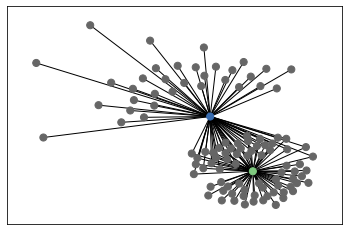

In [27]:
# Generate a networkx graph of uses quotations
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

breightbart_score = breitbart_uses.loc['breitbart.com']
carbonbrief_score = inside_climate_news_uses.loc['breitbart.com']

Dict = {"breitbart.com": 0, "insideclimatenews.org": 1}
nb_top = 70

cmap = plt.cm.Accent
norm = mpl.colors.Normalize(vmin=0, vmax=2)
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
G = nx.Graph()
G.add_nodes_from(Dict.keys())

for index, row in pd.DataFrame(breitbart_uses).head(nb_top).iterrows():
  if index != 'breitbart.com':
    Dict[index] = 2
    G.add_weighted_edges_from([('breitbart.com', index, breightbart_score/row)])

for index, row in pd.DataFrame(inside_climate_news_uses).head(nb_top).iterrows():
  if index != 'insideclimatenews.org':
    G.add_weighted_edges_from([('insideclimatenews.org', index, carbonbrief_score/row)])
    if index != 'breitbart.com':
      Dict[index] = 2

nodelist,node_color = zip(*Dict.items())
nx.draw_networkx(G, with_labels=False, nodelist=nodelist, node_size=50, node_color=node_color,vmin=0.0,vmax=2.0, cmap=cmap)
plt.show()

In [37]:
# Plot graph using plotly for data story
import plotly.graph_objects as go
edge_x = []
edge_y = []

pos_ = nx.spring_layout(G)
for edge in G.edges():
    x0, y0 = pos_[edge[0]]
    x1, y1 = pos_[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos_[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(list(G.nodes)[node])

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Breitbart & InsideClimateNews clusters',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.write_html('/content/drive/MyDrive/cluster_graph.html')
fig.show()

In [38]:
# Number of quotes reused uniquely by the same journal
reuse_breitbart=[]
reuse_inside_climate_news=[]
reuse_nyt=[]
for el in data_all['domain_name']:
  if np.size(el)>=2:
    if el.count('breitbart.com')==np.size(el):
      reuse_breitbart.extend(set(el))
    if el.count('insideclimatenews.org')==np.size(el):
      reuse_inside_climate_news.extend(set(el))
    if el.count('nytimes.com')==np.size(el):
      reuse_nyt.extend(set(el))
print(pd.Series(reuse_breitbart).value_counts())
print(pd.Series(reuse_inside_climate_news).value_counts())
print(pd.Series(reuse_nyt).value_counts())

breitbart.com    440
dtype: int64
insideclimatenews.org    559
dtype: int64
nytimes.com    864
dtype: int64


## Loading wikidata

In [40]:
# Loading wikidata labels
wikidata_file='/content/drive/MyDrive/Project datasets/wikidata_labels_descriptions_quotebank.csv.bz2'
wiki_df = pd.read_csv(wikidata_file, compression='bz2', index_col='QID')
wiki_df

,Label,Description
QID,,
Q31,Belgium,country in western Europe
Q45,Portugal,country in southwestern Europe
Q75,Internet,global system of connected computer networks
Q148,People's Republic of China,sovereign state in East Asia
Q155,Brazil,country in South America
...,...,...
Q106302506,didgeridooist,musician who plays the didgeridoo
Q106341153,biochemistry teacher,teacher of biochemistry at any level
Q106368830,2018 Wigan Metropolitan Borough Council electi...,NaN


In [ ]:
# Process parties of speakers in the parquet file
import pandas as pd
import numpy as np
wikidata_parquet_file='/content/drive/MyDrive/Project datasets/speaker_attributes.parquet'
parquet_df = pd.read_parquet(wikidata_parquet_file)
parties_df = parquet_df[~(parquet_df.party.isna())]['party']
res = parties_df.map(lambda parties: list(map(lambda party: wiki_df['Label'].get(party), parties)))
res.explode().value_counts().head(25)

# This brieve analysis just give an idea of the parties of the different speakers
# We take into account all parties of the speakers and not only their last one,
# this make sense as they might have been in a different party when they express their opinion

In [ ]:
authors = parquet_df.set_index('id')
authors_parties = authors['party']
authors_parties = authors_parties[~(authors_parties.isna())]
authors_parties

In [ ]:
breitbart_df = data_all[data_all.domain_name.map(lambda domaines: domaines.count('breitbart.com') > 0)]
inside_carbon_brief_df = data_all[data_all.domain_name.map(lambda domaines: domaines.count('insideclimatenews.org') > 0)]
print('breitbart -> '+str(len(breitbart_df)))
print('inside climate news -> '+str(len(inside_carbon_brief_df)))

In [4]:
def compute_authors_political_assignement(data_df, domaine_name):
  def repeat_qid(qids, n):
    if len(qids) > 0 :
      return [qids[0] for _ in range(n)]
    else:
      return [np.nan for _ in range(n)]

  speakers_df = data_df.apply(lambda s: repeat_qid(s['qids'], len(list(filter(lambda d: d=='insideclimatenews.org', s['domain_name'])))), axis=1).explode()#.drop_duplicates()
  non_identified = speakers_df[(speakers_df.isna())]

  speakers_df = speakers_df[~(speakers_df.isna())]
  speakers_parties_df = speakers_df.map(lambda s:authors_parties.get(s))
  speakers_parties_df
  political_distribution = speakers_parties_df.map(lambda parties: None if parties is None else list(map(lambda party: wiki_df['Label'].get(party), parties))[0])
  return (non_identified, political_distribution)

In [ ]:
(non_identified_breitbart, political_distribution_breitbart) = compute_authors_political_assignement(breitbart_df, 'breitbart.com')
print("Non-identified speaker or political parties :" +str(len(non_identified_breitbart)))
print("Others :" +str(len(political_distribution_breitbart.explode())))
political_distribution_breitbart.explode().value_counts().head(10)

No speakers :12463
Others :49125


Republican Party                 15258
Democratic Party                 10214
Independence Party of America     4142
independent politician            1468
Socialist Party                   1036
Christian Democratic Union         468
La République En Marche            466
Democratic Awakening               360
Liberty Union Party                330
Conservative Party                 216
dtype: int64

In [ ]:
# Use of icn for InsideClimateNews for more brievity
(non_identified_icn, political_distribution_icn) = compute_authors_political_assignement(inside_carbon_brief_df, 'insideclimatenews.org')
print("Non-identified speaker or political parties :" +str(len(non_identified_icn)))
print("Others :" +str(len(political_distribution_icn.explode())))
political_distribution_icn.explode().value_counts().head(10)

No speakers :8074
Others :13128


Republican Party                           2361
Democratic Party                           2173
Socialist Party                              78
Liberal Party of Canada                      44
La République En Marche                      43
independent politician                       39
Labour Party                                 39
Christian Democratic Union                   33
Australian Labor Party                       28
Minnesota Democratic–Farmer–Labor Party      27
dtype: int64

In [ ]:
# Compute statistics for breitbart
politics_b=(domaine_quotes_count.loc['breitbart.com'][0]-len(non_identified_breitbart))/domaine_quotes_count.loc['breitbart.com'][0]
typepo_b=political_distribution_breitbart.explode().value_counts()

republicanp_b=typepo_b.loc['Republican Party']/len(political_distribution_breitbart.explode())*politics_b
democratep_b=typepo_b.loc['Democratic Party']/len(political_distribution_breitbart.explode())*politics_b
independent_b=typepo_b.loc['Independence Party of America']/len(political_distribution_breitbart.explode())*politics_b

unknowsp_b=len(non_identified_breitbart)/domaine_quotes_count.loc['breitbart.com'][0]
other_parties_b=1-(unknowsp_b+democratep_b+republicanp_b+independent_b)

In [ ]:
# Compute statistiques for InsideClimatenews
politics_c=len(political_distribution_icn.explode())/domaine_quotes_count.loc['insideclimatenews.org'][0]
typepo_c=political_distribution_icn.explode().value_counts()

republicanp_c=typepo_c.loc['Republican Party']/len(political_distribution_icn.explode())*politics_c
democratep_c=typepo_c.loc['Democratic Party']/len(political_distribution_icn.explode())*politics_c

unknowsp_c=len(non_identified_icn)/domaine_quotes_count.loc['insideclimatenews.org'][0]
other_parties_c=1-(unknowsp_c+democratep_c+republicanp_c)

In [ ]:
# Imports and config for pie chart generation
import plotly.graph_objects as go
labels = ['Republicains','Democrats','Unknown','Other Parties','Independent']
colors=['red','blue','green','yellow','purple']

In [ ]:
# Distribution of authors political opinion for InsideClimateNews
values = [republicanp_c*100, democratep_c*100, unknowsp_c*100, other_parties_c*100]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(marker=dict(colors=colors))
fig.write_html('/content/drive/MyDrive/pieinside.html')
fig.show()

In [ ]:
# Distribution of authors political opinion for Breitbart
values = [republicanp_b*100, democratep_b*100, unknowsp_b*100, other_parties_b*100, independent_b*100]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(marker=dict(colors=colors))
fig.write_html('/content/drive/MyDrive/pie_breitbart_final.html')
fig.show()